# 项目10 神经网络

## 项目实训

### 任务一 神经网络完成鸢尾花分类任务

#### 1.数据读取

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris   
#iris数据集
dataset = load_iris() 
data = pd.DataFrame(dataset.data, columns=dataset.feature_names)
data['class'] = dataset.target    
#这里只取两类
data = data[data['class']!=2]

#### 2.数据预处理

In [8]:
#这里取两个属性为例
scaler = StandardScaler()
X = data[['sepal length (cm)','sepal width (cm)']]
scaler.fit(X)
#标准化数据集
X = scaler.transform(X)
Y = data[['class']]
#将数据集拆分为训练集和测试集
X_train, X_test, Y_train, Y_test =train_test_split(X, Y)

#### 3.训练模型

D:\ProgramData\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


score:
 1.0


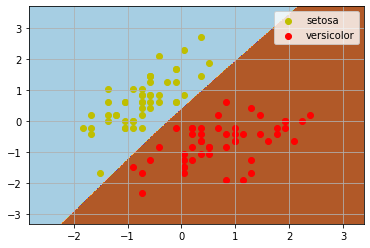

In [9]:
#MLP分类器
mpl = MLPClassifier(solver='lbfgs',activation='relu')
mpl.fit(X_train, Y_train)
#显示分类的正确率
print ('score:\n',mpl.score(X_test, Y_test)) 
h = 0.02
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
nn, mm = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = mpl.predict(np.c_[nn.ravel(), mm.ravel()])
Z = Z.reshape(nn.shape)
plt.contourf(nn, mm, Z, cmap=plt.cm.Paired)
class1_x = X[Y['class']==0,0]
class1_y = X[Y['class']==0,1]
l1 = plt.scatter(class1_x,class1_y,color='y',label=dataset.target_names[0])
class2_x = X[Y['class']==1,0]
class2_y = X[Y['class']==1,1]
l2 = plt.scatter(class2_x,class2_y,color='r',label=dataset.target_names[1])
plt.legend(handles = [l1, l2], loc = 'best')
plt.grid(True)
plt.show()

### 任务二 神经网络实例-手写识别

#### 1. 读取数据集

In [11]:
#导入数据集
from scipy.io import loadmat
data = loadmat('F:/10_digital.mat')
data 

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'y': array([[10],
        [10],
        [10],
        ...,
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)}

#### 2. 数据预处理

In [12]:
#处理数据
from sklearn.preprocessing import StandardScaler  
# 把X、y转化为数组形式，以便于计算
X = data['X']  
Y = data['y'] 
#X、Y的形状
X.shape, Y.shape  
# 标准化转换
scaler = StandardScaler()
# 训练标准化对象
scaler.fit(X) 
# 转换数据集
X = scaler.transform(X)

#### 3. 训练模型

In [13]:
#模型训练
from sklearn.model_selection import train_test_split 
from sklearn.neural_network import MLPClassifier
from sklearn.utils import check_random_state
#以25%的数据构建测试样本，剩余作为训练样本
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,
                                               random_state =2)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape
mlp = MLPClassifier(solver='lbfgs',hidden_layer_sizes=[200,100],
                    activation='relu', alpha = 1,random_state=62)
mlp.fit(X_train,Y_train)
print("===============================\n")
print('测试数据集得分：{:.2f}%'.format(mlp.score(X_test,Y_test)*100))
print("===============================\n")

D:\ProgramData\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



测试数据集得分：94.32%



## 项目拓展

### 良恶性肿瘤预测

#### 1.数据读取

In [14]:
#导入breast_cancer数据集
from sklearn.datasets import load_breast_cancer
#从sklearn的datasets模块载入数据集
cancer = load_breast_cancer()

#### 2.数据预处理

In [15]:
#导入数据集拆分工具
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(cancer.data, 
        cancer.target, stratify=cancer.target, random_state=66)
# 标准化数据
from sklearn.preprocessing import StandardScaler
nn = StandardScaler()
X_train = nn.fit_transform(X_train)
X_test = nn.transform(X_test)

#### 3.训练模型

In [16]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(solver='lbfgs',hidden_layer_sizes=[10,10],
                  activation='tanh',alpha=1)
mlp.fit(X_train,Y_train)
print("===============================\n")
print('测试数据集得分：{:.2f}%'.format(mlp.score(X_test,Y_test)*100))
print("===============================\n")


测试数据集得分：96.50%

